In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

In [2]:
%cd ..\data\processed

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\data\processed


In [3]:
data = pd.read_csv('3.0 Processed Data with Dummy Variables.csv', index_col = 'Unnamed: 0')
data.head()

,Survey_ID,Age,Education_Completed,Household_Size,No_One,Spouse,Children,Grand_Children,Parent,Grandparent,...,Housing_Mobile house,Housing_One-family house,Housing_Two-family house/ duplex,Religious_Attendance_0,Religious_Attendance_A few times a year,Religious_Attendance_Once or twice a month,Religious_Attendance_Seldom,Status_of_Ownership_3,Status_of_Ownership_Own,Status_of_Ownership_Rent
0,80314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,60171,60.0,13.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1011601,23.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,50046,73.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,10494,29.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = data.drop(['Survey_ID', 'Quality_of_Life','Satisfied_With_Life_1','Satisfied_With_Life_2'],axis=1)

In [5]:
reg = setup(data = data, 
            target = 'Satisfaction_Score', 
            train_size=0.8, 
            categorical_features = [
                'No_One','Grandparent',
                'Other_Relative',
                'Other',
                'Self_Employed_Full_Time',
                'Self_Employed_Part_Time',
                'Disabled','Unemployed',
                'Other_Employement',
                'Psychiatrist',
                'Therapist/Counselor'])

 
Setup Succesfully Completed.


,Description,Value
0,session_id,4073
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(2609, 248)"
4,Missing Values,False
5,Numeric Features,64
6,Categorical Features,183
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
model_df = compare_models(blacklist = ['tr'], turbo=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,2.4501,10.5436,3.2444,0.3208,0.5335,0.3121,6.9260
1,Random Forest,2.4613,10.6561,3.2621,0.3135,0.5396,0.3122,5.3654
2,CatBoost Regressor,2.4574,10.7590,3.2776,0.3056,0.5341,0.3121,22.7537
3,Gradient Boosting Regressor,2.4512,10.7652,3.2800,0.3037,0.5365,0.3168,2.8482
4,Bayesian Ridge,2.4718,10.9120,3.3010,0.2964,0.5437,0.3154,0.3188
5,Orthogonal Matching Pursuit,2.5067,11.1365,3.3353,0.2814,0.5440,0.3180,0.0529
6,Light Gradient Boosting Machine,2.5027,11.2161,3.3466,0.2755,0.5419,0.3148,0.5142
7,Huber Regressor,2.5327,11.9332,3.4511,0.2308,0.5608,0.3338,1.4357
8,Extreme Gradient Boosting,2.5863,11.9162,3.4489,0.2275,0.5502,0.3276,3.2816
9,Ridge Regression,2.6137,11.9794,3.4600,0.2263,0.5537,0.3338,0.0500


In [7]:
model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6850,12.9502,3.5986,0.2238,0.6180,0.3687
1,2.3332,10.0217,3.1657,0.3564,0.5363,0.2756
2,2.4764,11.0632,3.3261,0.3941,0.5900,0.2493
3,2.4588,10.9461,3.3085,0.3285,0.5563,0.2959
4,2.2756,9.1980,3.0328,0.4189,0.5249,0.2966
5,2.4196,10.1032,3.1786,0.3884,0.5182,0.2644
6,2.7122,12.9505,3.5987,0.2549,0.6588,0.3286
7,2.6132,12.0702,3.4742,0.2385,0.5886,0.3403
8,2.4165,9.6153,3.1009,0.3388,0.4483,0.2391
9,2.5749,12.2099,3.4943,0.2559,0.5246,0.1920


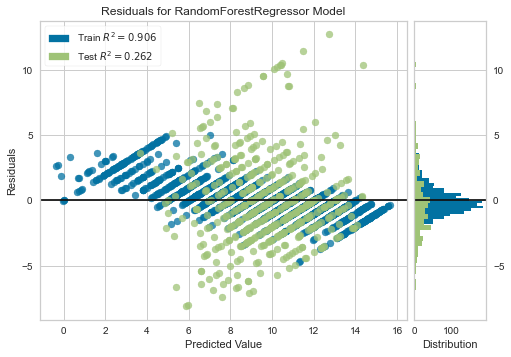

In [17]:
%cd figures
plot_model(model, save=True)

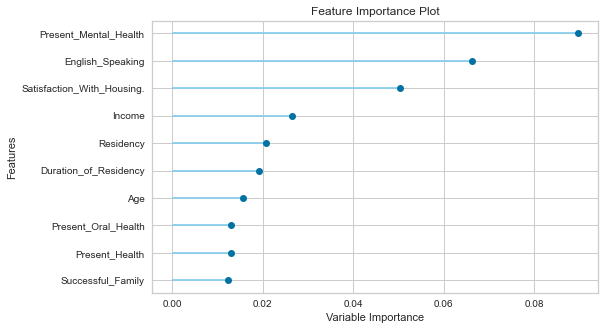

In [18]:
plot_model(model, 'feature', save=True)

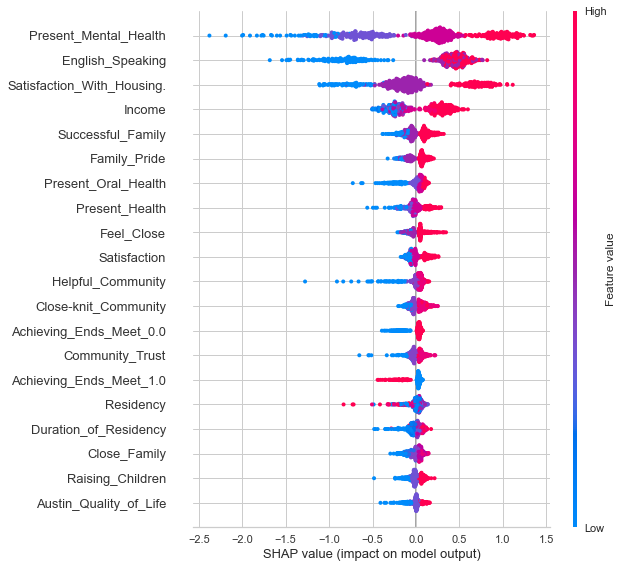

In [20]:
interpret_model(model)

In [ ]:
plot_model(model, 'rfe', save=True)

IntProgress(value=0, description='Processing: ', max=5)

In [22]:
model_6 = create_model('rf', max_features=6)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6758,12.9650,3.6007,0.2229,0.6218,0.3657
1,2.6025,11.2011,3.3468,0.2807,0.5582,0.3015
2,2.7054,12.9430,3.5976,0.2911,0.6252,0.2633
3,2.5665,11.8265,3.4390,0.2745,0.5793,0.3377
4,2.4569,9.9099,3.1480,0.3739,0.5448,0.3186
5,2.6041,11.8364,3.4404,0.2835,0.5532,0.2899
6,2.7685,13.4776,3.6712,0.2246,0.6709,0.3410
7,2.7305,12.3624,3.5160,0.2201,0.5933,0.3767
8,2.5573,10.4732,3.2362,0.2798,0.4653,0.2404
9,2.7337,13.2236,3.6364,0.1941,0.5366,0.1986


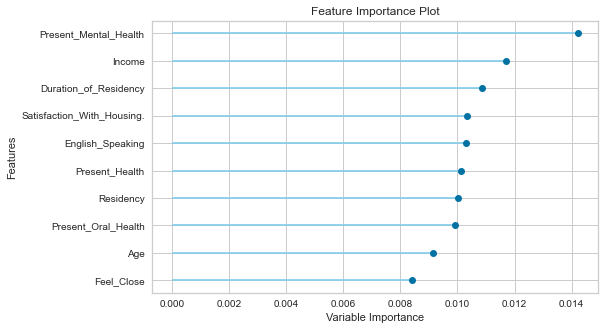

In [23]:
plot_model(model_6, 'feature', save=True)

In [24]:
final_model = finalize_model(model)

In [25]:
%cd ..\..\models
save_model(final_model, 'target_1_08112020')

C:\Users\SiddharthaMisra\Documents\Springboard\AAQL_Analysis\models
Transformation Pipeline and Model Succesfully Saved
